In [1]:
# NLP Talents Team Projects Preprocessing notebook 4

# inspiration

import numpy as np 
import nltk
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:
# data in

data = pd.read_csv('newdata.csv')
data.tail(10)

,Unnamed: 0,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,Verfied,User Since,Location,Bio,Profile Image,Airport_Twitter_Tag,Airport_IATA_Codes,Airport_Names
286467,868176,3/20/2021 18:45:05,@jetairways2021,Jet Airways 2021,RT @I_m_michael_asr: @STN_Airport Happy birthd...,1.373262e+18,Twitter for iPhone,2408.0,3545.0,2.0,0.0,No,11/30/2019,"Mumbai, India",India�s ???? best premium airline based at @CS...,View,@stn_airport,"STN, STN","London Stansted Airpor, London Stansted Airpor"
286468,868241,3/22/2021 15:07:55,@Aviation_jamie,J,@STN_Airport Thank you very much ??????,1.373932e+18,Twitter for iPhone,260.0,171.0,0.0,1.0,No,11/4/2020,NaN,Photographer ?????? LHR Ground Handler ?? Aspi...,View,@stn_airport,STN,London Stansted Airpor
286469,868268,3/22/2021 21:54:11,@Antoine71284847,??BeeCharmer ?? Earthling ??,@STN_Airport At last ..,1.374034e+18,Twitter for iPhone,1270.0,896.0,0.0,0.0,No,11/21/2016,"Paris, London , Australasia .","??Antoinette , @VoiceoverAudio :Actor Artist &...",View,@stn_airport,STN,London Stansted Airpor
286470,868290,3/23/2021 16:05:01,@Fede282,Federico Foggia,@STN_Airport Send a DM about your opening time...,1.374309e+18,Twitter for iPhone,76.0,172.0,0.0,0.0,No,2/1/2011,A destra dalla tua sinistra,Entrepeneur Manager proudly graduated in Banki...,View,@stn_airport,STN,London Stansted Airpor
286471,868297,3/23/2021 19:11:27,@TurksonEmmanu13,WHOLE LOTTA PAIN??,@STN_Airport ????,1.374356e+18,Twitter for iPhone,577.0,1871.0,0.0,1.0,No,4/6/2020,"Accra, Ghana",God?? @manutd??@_miyaamarie??@badazzChe92????,View,@stn_airport,STN,London Stansted Airpor
286472,868309,3/23/2021 21:21:43,@AirbusRed,AirbusRed,@STN_Airport Thank you ??,1.374388e+18,Twitter for iPhone,11378.0,1057.0,0.0,0.0,No,10/3/2009,"Manchester, England",?? Airbus A320 Captain. Takes pictures of avia...,View,@stn_airport,STN,London Stansted Airpor
286473,868344,3/24/2021 13:56:49,@lou26chris,louisa hardy,@STN_Airport Good morning stansted airport ????,1.374639e+18,Twitter for iPhone,95.0,958.0,0.0,0.0,No,2/24/2013,NaN,"My loves are family , friends , holidays in th...",View,@stn_airport,STN,London Stansted Airpor
286474,868346,3/24/2021 15:03:10,@lou26chris,louisa hardy,@STN_Airport OMG ...... if only you knew how m...,1.374656e+18,Twitter for iPhone,95.0,958.0,0.0,1.0,No,2/24/2013,NaN,"My loves are family , friends , holidays in th...",View,@stn_airport,STN,London Stansted Airpor
286475,868347,3/24/2021 15:06:29,@lou26chris,louisa hardy,@STN_Airport @KevinS22551757 Spain is in my bl...,1.374656e+18,Twitter for iPhone,95.0,958.0,0.0,1.0,No,2/24/2013,NaN,"My loves are family , friends , holidays in th...",View,@stn_airport,STN,London Stansted Airpor
286476,868350,3/24/2021 15:59:14,@PeterButterfi12,Peter Butterfield,@STN_Airport Thanks @STN_Airport for your quic...,1.374670e+18,Twitter for iPhone,0.0,31.0,0.0,0.0,No,11/21/2020,NaN,NaN,View,@stn_airport,"STN, STN","London Stansted Airpor, London Stansted Airpor"


In [3]:
# dropping columns away

data.drop(['Screen Name', 'Full Name', 'Tweet ID', 'App', 'Verfied', 'User Since', 'Location', 'Bio', 'Profile Image'], axis = 1, inplace = True)
data.head()

,Unnamed: 0,Date,Tweet Text,Followers,Follows,Retweets,Favorites,Airport_Twitter_Tag,Airport_IATA_Codes,Airport_Names
0,15421,4/7/2017 7:52,Update: Flt EI7RE departed back to Dublin at 0...,20959.0,240.0,0.0,0.0,@dublinairport,DUB,Dublin Airport
1,25645,12/3/2018 14:06,"@DublinAirport Ah lads come on, rally the troo...",1433.0,637.0,0.0,0.0,@dublinairport,DUB,Dublin Airport
2,88734,12/24/2020 19:34:34,@DublinAirport https://t.co/8XPuZnW0P9,27616.0,868.0,0.0,0.0,@dublinairport,DUB,Dublin Airport
3,181260,6/12/2020 0:33:26,@brskyrme @VirginAtlantic @HeathrowAirport @br...,51130.0,3181.0,0.0,0.0,@heathrowairport,LHR,Heathrow Airport
4,262833,8/29/2020 0:36:32,@JetSetGOConnor @flykkylie @HeathrowAirport @S...,27451.0,452.0,0.0,2.0,@heathrowairport,LHR,Heathrow Airport


In [4]:
data.duplicated().sum()

0

In [5]:
# We want to remove any unnecessary qualities in the data.
# Text preprocessing involves many things like removing emojis, 
# properly formatting the text to remove extra spaces or any other information 
# in the text that we don’t believe would add information. We’ll see some examples below.
# We also have to make sure that the information we pass the model is in a format that 
# computers can understand. 
# After this pre-processing step, our data should be ready to use.

In [9]:
import pandas as pd
import nltk
import numpy as np
import csv
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

import re
from collections import Counter
from string import punctuation
import tweepy
from tweepy import OAuthHandler
import json
from wordcloud import WordCloud

import plotly
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from IPython.display import IFrame
import folium
from folium import plugins
from folium.plugins import MarkerCluster, FastMarkerCluster, HeatMapWithTime

pd.set_option('display.max_colwidth', -1)
plt.style.use('seaborn-white')

<ipython-input-9-1b6c1a136008>:41: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [10]:
import re
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

In [11]:
# helper function to clean tweets
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet
# ______________________________________________________________
# clean dataframe's text column
data['Tweet Text'] = data['Tweet Text'].apply(processTweet)
# preview some cleaned tweets
data['Tweet Text'].head(25)

0     update flt ei7re departed back dublin 0230 but flt ei33l offloading passengers here for transfer via coach 
1     lads come rally the troops for your pals they� only ahead                                                  
2                                                                                                                
3     june british airways resumed daily service from sfo lhr                                                    
4                                                                                                                
5     amazing trip now way home with thx jfk for the awesome service hospitality                                 
6     from brazil get hours there and have nice flight to20 problem leave the airport turn london                
7     fast track yeah right slow                                                                                 
8     what with drop off lanes terminal the queue reaches 30min                         

In [12]:
# remove unwanted characters, numbers and symbols 
data['Tweet Text'] = data['Tweet Text'].str.replace("[^a-zA-Z#]", " ")
data['Tweet Text'].head(25)

<ipython-input-12-2358c0c67053>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



0     update flt ei re departed back dublin      but flt ei  l offloading passengers here for transfer via coach 
1     lads come rally the troops for your pals they  only ahead                                                  
2                                                                                                                
3     june british airways resumed daily service from sfo lhr                                                    
4                                                                                                                
5     amazing trip now way home with thx jfk for the awesome service hospitality                                 
6     from brazil get hours there and have nice flight to   problem leave the airport turn london                
7     fast track yeah right slow                                                                                 
8     what with drop off lanes terminal the queue reaches   min                         

In [13]:
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')
# function to remove stopwords 
def remove_stopwords(rev):     
  rev_new = " ".join([i for i in rev if i not in stop_words])      
  return rev_new 
# remove short words (length < 3) 
data['Tweet Text'] = data['Tweet Text'].apply(lambda x: ' '.join([w for 
                   w in x.split() if len(w)>2])) 
# remove stopwords from the text 
reviews = [remove_stopwords(r.split()) for r in data['Tweet Text']] 
# make entire text lowercase 
reviews = [r.lower() for r in reviews]

In [14]:
data['Tweet Text'].head(25)

0     update flt departed back dublin but flt offloading passengers here for transfer via coach             
1     lads come rally the troops for your pals they only ahead                                              
2                                                                                                           
3     june british airways resumed daily service from sfo lhr                                               
4                                                                                                           
5     amazing trip now way home with thx jfk for the awesome service hospitality                            
6     from brazil get hours there and have nice flight problem leave the airport turn london                
7     fast track yeah right slow                                                                            
8     what with drop off lanes terminal the queue reaches min                                               
9     landan       

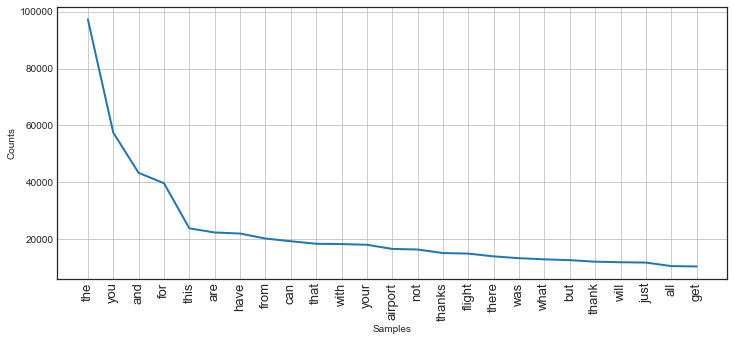

Text(0.5, 0, 'Word Rank')

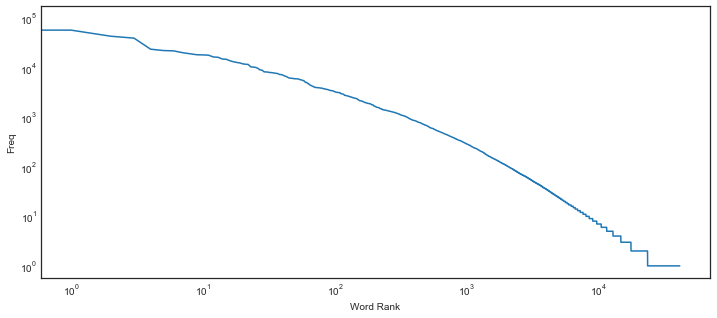

In [15]:
# most common words in twitter dataset
all_words = []
for line in list(data['Tweet Text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log of all words 
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

In [16]:
# tokenize helper function
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]
def remove_words(word_list):
    remove = ['the','you','...','“','”','’','…','and’']
    return [w for w in word_list if w not in remove]
# -------------------------------------------
# tokenize message column and create a column for tokens
data = data.copy()
data['tokens'] = data['Tweet Text'].apply(text_process) # tokenize style 1
data['no_tokens'] = data['tokens'].apply(remove_words) #tokenize style 2
data.head()

,Unnamed: 0,Date,Tweet Text,Followers,Follows,Retweets,Favorites,Airport_Twitter_Tag,Airport_IATA_Codes,Airport_Names,tokens,no_tokens
0,15421,4/7/2017 7:52,update flt departed back dublin but flt offloading passengers here for transfer via coach,20959.0,240.0,0.0,0.0,@dublinairport,DUB,Dublin Airport,"[update, flt, departed, back, dublin, flt, offloading, passengers, transfer, via, coach]","[update, flt, departed, back, dublin, flt, offloading, passengers, transfer, via, coach]"
1,25645,12/3/2018 14:06,lads come rally the troops for your pals they only ahead,1433.0,637.0,0.0,0.0,@dublinairport,DUB,Dublin Airport,"[lads, come, rally, troops, pals, ahead]","[lads, come, rally, troops, pals, ahead]"
2,88734,12/24/2020 19:34:34,,27616.0,868.0,0.0,0.0,@dublinairport,DUB,Dublin Airport,[],[]
3,181260,6/12/2020 0:33:26,june british airways resumed daily service from sfo lhr,51130.0,3181.0,0.0,0.0,@heathrowairport,LHR,Heathrow Airport,"[june, british, airways, resumed, daily, service, sfo, lhr]","[june, british, airways, resumed, daily, service, sfo, lhr]"
4,262833,8/29/2020 0:36:32,,27451.0,452.0,0.0,2.0,@heathrowairport,LHR,Heathrow Airport,[],[]


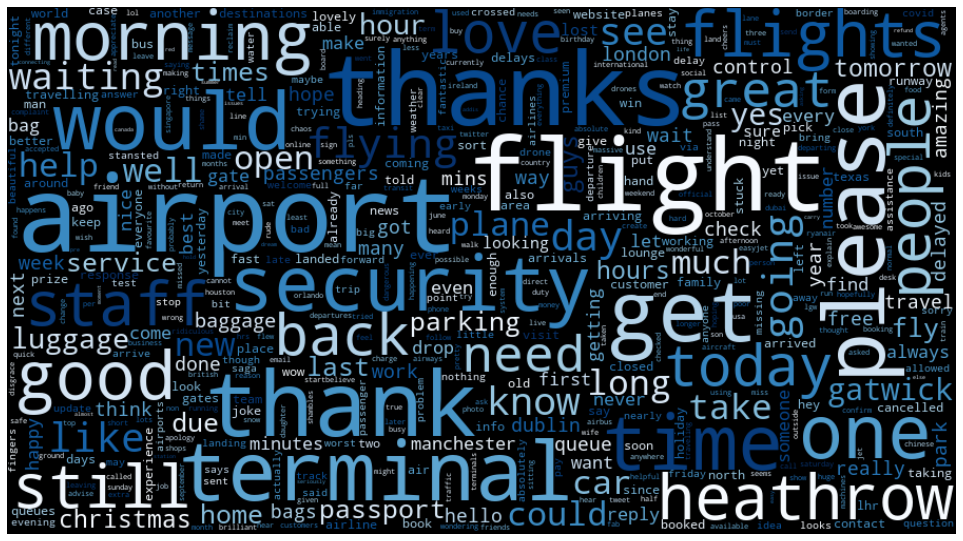

In [17]:
# split sentences to get individual words
all_words = []
for line in data['no_tokens']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
data.to_csv('newcleaneddata17082021.csv')